#시작하기 전에

---

전에 비교했던 모델에서 길이가 50cm인 농어를 모델에 넣는다면 결과값은 무려 1.5kg이 차이나는 결과가 나오는데 이는 k-최근접 이웃 회귀의 한계를 보여준다.

결국 train세트의 어느정도 범주안에 있어야 예측값이 나온다는 것이 k-최근접 이웃 회귀의 한계이다.

# k-최근접 이웃 회귀의 한계

## KNeighborsRegressor 복습하기

In [ ]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
train_target = train_target.reshape(-1, 1)
test_target = test_target.reshape(-1, 1)

print(train_input.shape)

#객채를 만들고 n_neighbors를 정해도 괜찮지만 객체를 생성하면서도 가능하다.
knr = KNeighborsRegressor(n_neighbors = 3)

knr.fit(train_input, train_target)
print(knr.predict([[50]]))



(42, 1)
[[1033.33333333]]


위 모델이 예측한 농어의 값은 1033.333g 정도이다. 그런데 실제 해당 농어의 무게는 더 많이 나가는데 어디서 문제가 발생한건지 알아보자

## 시각화

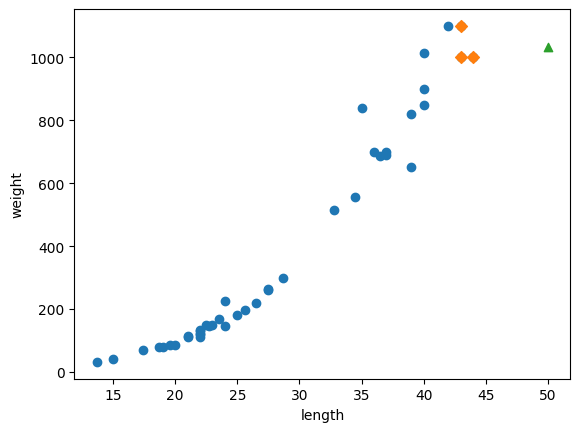

[[[44.]
  [43.]
  [43.]]]
1033.3333333333333


In [ ]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃 구하기

distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = "D")
plt.scatter(50, knr.predict([[50]]), marker = "^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
print(train_input[indexes])
print(np.mean(train_target[indexes]))

위 결과에서 알 수 있는 점은 가장 가까운 3개의 이웃이 44cm, 43cm, 43cm이기 떄문에 50 근처의 값은 정확한 판단이 어려운 것을 알 수 있다. 이 경우에는 길이가 아무리 길어도 가장 가까운 값은 마름모 표시인것을 알 수 있다.

[[1033.33333333]]


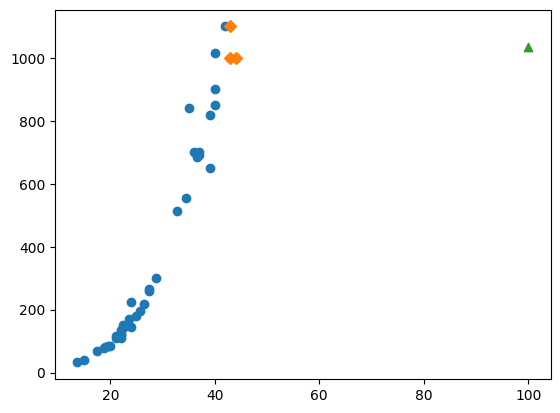

In [ ]:
distances, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = "D")
plt.scatter(100, knr.predict([[100]]), marker = "^")
print(knr.predict([[100]]))

현제 모델로는 아무리 길이가 길어져도 무게에 변화가 없을것이다.

# 선형 회귀

---

션형회귀(linear regressor)은 널리 사용되는 대표적인 회귀 알고리즘이다. 비교적 간단하고 선능이 뛰어나기 때문에 맨 처음 배우는 머신러닝 알고리즘 중 하나이다.

말 그대로 데이터셋에 선을 만들고 예측값 또한 그 선을 따라서 나타난다.

사이킷런은 sklearn.linear_model 패키지 아래에 LinearRegression 클래스로 선형 회귀 알고리즘을 구현해 놓았기때문에 이 클래스의 객채를 만들어서 훈련할으로 fit, score, predict 모두 가능하다.

## LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# 선형 회귀 모델을 훈련
lr.fit(train_input, train_target)

lr.predict([[50]])

print(lr.predict([[100]]))

[[3192.69585141]]


선형 회귀 모델에서는 길이가 늘어남에 따라서 무게도 늘어남을 확인할 수 있다.

## LinearRegression 시각화

---

선형 회귀에서 선은 방정식
$$y = ax + b$$ 로 나타낼 수 있는데 여기에서 결과를 나타내는 y는 무게이고 x는 길이이다.

따라서 적절한 a, b가 있으면 그래프로 나타낼 수 있는데 이는 LinearRegression 클래스의 lr 객체에 coef_(a)와
intercept(b)_속성으로 저장되어있다.



In [ ]:
print(lr.coef_, lr.intercept_)

[[39.01714496]] [-709.01864495]


(1,)
(1,)


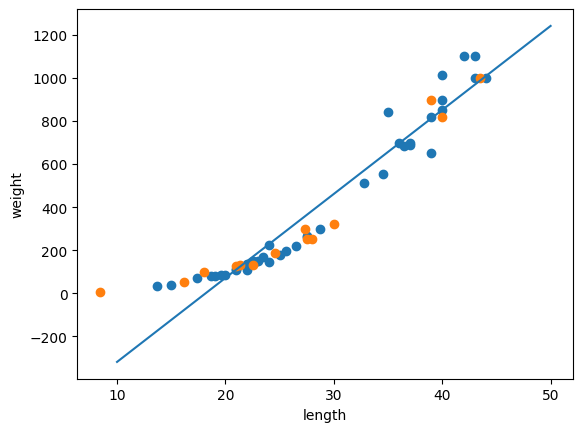

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)

# 15에서 50까지 1차 방정식 그래프 그리기
# 위 방정식애서 length가 15에서 50까지를 선으로 나타내는데 x가 length로 선을 그려준다.
a = 10 * lr.coef_ + lr.intercept_

b = 50 * lr.coef_ + lr.intercept_

a = a.reshape(-1,)
b = b.reshape(-1,)

print(a.shape)
print(b.shape)

plt.plot([10, 50], [a, b])

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [ ]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


결과를 통해서 알 수 있는 사실은 선형회귀 자체는 제대로 이루어졌지만, 테스트 세트를 넣었을때 점수가 크게 떨어진 것을 알 수 있다.

그 이유로는 선형을 따라 값을 예측하는데 반해 테스트의 값이 약간 떨어져있기 때문이다.

## coefficient, intercept

---

sklearn.linear_model 패키지에 있는 LinearRegression클래스에서 fit을 거치고 나오는 coef_와 intercept_를 머신러닝 알고리즘이 찾은 값이라는 의미로 **모델 파라미터(model parameter)**로 부른다.


이 머신러닝 과정에서 사용하는 많은 머신러닝 알고리즘의 훈련 과정은 최적의 모델 파라미터를 찾는 것과 같다. 이를 **모델 기반 학습** 이라고 부른다.

앞서 사용한 k-최근접 이웃에는 모델 파라미터가 없다. 훈련세트를 저장하는 것이 훈련의 전부였는데 이를 **사례 기반 학습** 이라 부른다.

위 coef는 coefficient로 머신러닝에서 기울기를 나타내는 종종 계수 또는 가중치(weight)다.

#다항 회귀(polynomial regression)

---

선형 회귀에서 테스트점수가 낮게나온 이유는 길이가 10으로 가면 무게가 -200g으로 예측해버리는 기현상이 생기기 때문인데 이는 다항 회귀를 통해서 조절할 수 있다.

## 제곱 데이터 합치기

---

앞서 배웠던 np.column_stack을 이용해서 길이를 제곱한 값을 합쳐준다.

합쳐주는 이유는 fit을 할때에는 다항식을 넣어야 하기 때문인데 그때의 식은
$$ ax^2 + bx + c $$
와 같은 것이기 때문에 길이를 나타내는 x와 x제곱을 같이 넣는것이라 볼 수 있다.

In [ ]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

print(train_poly.shape, test_poly.shape)

lr = LinearRegression()

lr.fit(train_poly, train_target)

lr.predict([[50 ** 2, 50]])



(42, 2) (14, 2)


array([[1573.98423528]])

위 결과를 통해서 앞선 선형 회귀에서보다 더 높은 weight를 반환했음을 알 수 있다.

## 다항식 계수와 절편

---

다항식이면 1차식이 아니기 때문에 선형회귀가 아니지 않냐라고 볼 수 있지만
$$ X^2 = x $$
$$ y = aX^2 + b$$ $$x = length, y = weight, a = coefficient, b = intercept$$
위와같이 표현 가능하다.

즉, 길이를 제곱한것과 무게의 선형 관계로 표현 가능하다.

In [ ]:
print(lr.coef_, lr.intercept_)

[[  1.01433211 -21.55792498]] [116.05021078]


위에서 lr.coef가 두개의 값을 지니는 이유는 다항식에서의 a와 b가 나온것이고 식은 다음과 같다.

$$ weight = 1.01433211 * length^2 + -21.55792498 * length + 116.05021078 $$

위와 같은 방정식을 다항식(polynomial)이라 부르며 다항식을 사용한 선형 회귀를 다항 회귀(polynomial regression)라 부른다.

## 시각화 및 결과 확인

In [1]:
# 구간별 직선을 그리기 위해서 15에서 40까지 정수 배열 만들기
point = np.arange(15, 50)

# 훈련 세트의 산점도 그리기

plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.plot(point, 1.01*point**2 + -21.6*point + 116.05)

plt.xlabel("length")
plt.ylabel("weight")
plt.show()


print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

NameError: ignored

훈련세트와 테스트세트 모두 점수가 향상되었지만 테스트세트의 점수가 더 높게 나왔기 때문에 과소적합의 가능성이 남아있음

#고찰

---

3장에서는 KNeighborsRegressor클래스의 복습을 진행하고 그 한계를 알아보았다.

한계는 결국 훈련세트의 이웃근처에 테스트세트가 있어야 비슷한 결과가 나온다는 것이고, 테스트의 입력값이 훈련세트의 범주를 벗어난다면 같은 값만을 출력한다는 사실을 알게되었다.

때문에 sklearn.Linear_model 패키지의 LinearRegression 클래스가 제공하는 선형회귀를 사용하게 되었는데 일차식으로 결과를 도출할 경우 무게가 음수가 되는 경우 역시 존재해서 다항회귀를 사용하게 되었다.

길이를 제곱한 배열을 추가하려 학습하였고 그에 따라서 식은 2차방정식으로 변하고 훈련세트가 분포된 형태를 잘 표현하였다.

마지막 결과에서 테스트세트가 더 높은 점수를 나타내었기 때문에 과소적합의 가능성이 있었다.